In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install Mandatory Package(s)

In [ ]:
# Import Deep Learning Library
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import Pretrained Model Library
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import efficientnet, MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint

# Import Dataset Preprocessing Library
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import OS
import os
from google.colab import files
import shutil

## Data Preprocessing

In [ ]:
# Define Path Train and Test Directory
train_dataset_path = "/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Dataset/train"
test_dataset_path = "/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Dataset/test"

BATCH_SIZE = 32

# Make Train and Test Datagen for ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Generate Image Generator for train and test
train_generator = train_datagen.flow_from_directory(
    directory=train_dataset_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    # color_mode='grayscale',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dataset_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    # color_mode='grayscale',
    shuffle=True,
    seed=42
)

Found 2302 images belonging to 19 classes.
Found 385 images belonging to 19 classes.


In [ ]:
# Extract a batch of data from the generator
images, labels = next(train_generator)

# Print the shape of the batch of images and labels
print("Shape of images batch:", images.shape)
print("Shape of labels batch:", labels.shape)

Shape of images batch: (32, 224, 224, 3)
Shape of labels batch: (32, 19)


In [ ]:
# Get class indices and create a reverse mapping
images_class_indices = train_generator.class_indices
labels_index_to_class = {v: k for k, v in images_class_indices.items()}

# Define train labels that could be reused on later stage
train_labels = [labels_index_to_class[idx] for idx in range(len(labels_index_to_class))]
print("Class names:", train_labels)

Class names: ['.Non Batik', 'Buketan', 'Cendrawasih', 'Corak Insang', 'Dayak', 'Gunungan', 'Jlamprang', 'Kawung', 'Liong', 'Megamendung', 'Parang', 'Prada', 'Pring Sedapur', 'Sekar', 'Sidoluhur', 'Singa Barong', 'Truntum', 'Tujuh Rupa', 'Tumpal']


#### 12 Label

In [ ]:
# Define Path Train and Test Directory
train_dataset_path = "/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Dataset/12 Label/train"
test_dataset_path = "/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Dataset/12 Label/test"

BATCH_SIZE = 32

# Make Train and Test Datagen for ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Generate Image Generator for train and test
train_generator = train_datagen.flow_from_directory(
    directory=train_dataset_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    # color_mode='grayscale',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dataset_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    # color_mode='grayscale',
    shuffle=True,
    seed=42
)

# Extract a batch of data from the generator
images, labels = next(train_generator)

# Print the shape of the batch of images and labels
print("Shape of images batch:", images.shape)
print("Shape of labels batch:", labels.shape)

# Get class indices and create a reverse mapping
images_class_indices = train_generator.class_indices
labels_index_to_class = {v: k for k, v in images_class_indices.items()}

# Define train labels that could be reused on later stage
train_labels = [labels_index_to_class[idx] for idx in range(len(labels_index_to_class))]
print("Class names:", train_labels)

Found 1440 images belonging to 12 classes.
Found 240 images belonging to 12 classes.
Shape of images batch: (32, 224, 224, 3)
Shape of labels batch: (32, 12)
Class names: ['Buketan', 'Cendrawasih', 'Corak Insang', 'Gunungan', 'Kawung', 'Megamendung', 'Parang', 'Prada', 'Sekar', 'Sidoluhur', 'Truntum', 'Tumpal']


## Model Building & Fitting

In [ ]:
# Define Additional Variabel for Model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

num_classes = len(train_generator.class_indices)

### 1. VGG16

In [ ]:
# Load Pretrained VGG16 Model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Make the Trainable Layers to False
for layer in vgg16.layers:
    layer.trainable = False

# Flatten the output of the VGG16 model
x = tf.keras.layers.Flatten()(vgg16.output)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Add a dense layer with ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)

# Add the output layer with softmax activation
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the final model
vgg16_model = tf.keras.models.Model(inputs=vgg16.input, outputs=predictions)

# Print model summary
vgg16_model.summary(show_trainable=True)

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         N          
                                                                            
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      N          
                                                                            
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     N          
                                                                            
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         N          
                                                                            
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     N          
                                                                         

In [ ]:
EPOCHS = 50

vgg16_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy']
)

vgg16_history = vgg16_model.fit(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN,
      epochs=EPOCHS,
      validation_data=test_generator,
      validation_steps=STEP_SIZE_TEST,
      verbose=1
)

Epoch 1/50
79/79 [==============================] - 1183s 15s/step - loss: 2.2809 - accuracy: 0.3239 - val_loss: 1.4783 - val_accuracy: 0.5962
Epoch 2/50
79/79 [==============================] - 58s 736ms/step - loss: 1.4054 - accuracy: 0.5900 - val_loss: 1.1148 - val_accuracy: 0.6947
Epoch 3/50
79/79 [==============================] - 58s 737ms/step - loss: 1.1139 - accuracy: 0.6753 - val_loss: 1.0016 - val_accuracy: 0.7115
Epoch 4/50
79/79 [==============================] - 59s 747ms/step - loss: 0.9450 - accuracy: 0.7283 - val_loss: 0.8671 - val_accuracy: 0.7428
Epoch 5/50
79/79 [==============================] - 58s 732ms/step - loss: 0.8053 - accuracy: 0.7494 - val_loss: 0.8379 - val_accuracy: 0.7596
Epoch 6/50
79/79 [==============================] - 58s 732ms/step - loss: 0.7493 - accuracy: 0.7713 - val_loss: 0.7999 - val_accuracy: 0.7620
Epoch 7/50
79/79 [==============================] - 57s 720ms/step - loss: 0.6880 - accuracy: 0.7857 - val_loss: 0.7990 - val_accuracy: 0.7668

In [ ]:
# Visualize the History Model : Accuracy & Loss
acc_1 = vgg16_history.history['accuracy']
val_acc_1 = vgg16_history.history['val_accuracy']

loss_1 = vgg16_history.history['loss']
val_loss_1 = vgg16_history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (VGG16)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (VGG16)')
plt.show()

In [ ]:
# Save model in Keras format
model_save_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/vgg16_23label50_new.h5'
vgg16_model.save(model_save_path)
print("Model saved to Google Drive at:", model_save_path)

# Save training history to CSV
history_df = pd.DataFrame(vgg16_history.history)
history_save_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/vgg16_history_23label50_new.csv'
history_df.to_csv(history_save_path, index=True)
print("Training history saved to Google Drive at:", history_save_path)

#### Predict Model

In [ ]:
# Define Path Train and Test Directory
predict_dataset_path = "/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Dataset/predict2"

# Make Predict Datagen for ImageDataGenerator
predict_datagen = ImageDataGenerator(
    rescale=1./255
)

# Generate Image Generator for predict
predict_generator = predict_datagen.flow_from_directory(
    directory=predict_dataset_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    # color_mode='grayscale',
    shuffle=False
)

file_names = predict_generator.filenames  # save list of test files names to be used later
tlabels = predict_generator.labels # save test labels to be used later
class_dict = predict_generator.class_indices
# code below determines test batch size and test steps so you go through the test images exactly once
length = len(file_names) # determine number of images
b_max = 80 # set maximum batch size you will allow
predict_batch_size = sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=b_max], reverse=True)[0]
predict_steps = int(length/BATCH_SIZE)

Found 48 images belonging to 21 classes.


In [ ]:
# Load the Keras model from the uploaded file
# model_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/vgg16_23label50.h5'  # Update with the correct filename
# vgg16_model = tf.keras.models.load_model(model_path)

# make predictions
preds = vgg16_model.predict(predict_generator, batch_size=predict_batch_size, verbose=0, steps=predict_steps)
new_dict = {}
for key in class_dict: # set key in new_dict to value in class_dict and value in new_dict to key in class_dict
    value = class_dict[key]
    new_dict[value] = key
print('PREDICTED CLASS     TRUE CLASS       FILENAME                ERROR STATUS' ) # adjust spacing based on your class names
error_list = [] # empty list to store if the prediction was correct or not
error_file_list = []
for i, p in enumerate(preds):
    pred_index = np.argmax(p) # get the index that has the highest probability
    if pred_index == tlabels[i]:
        error_list.append('No') # correct classification
    else:
        error_list.append('Yes')
        error_file_list.append(file_names[i])
    pred_class = new_dict[pred_index] # find the predicted class based on the index
    true_class = new_dict[tlabels[i]] # use the test label to get the true class of the test file
    file = file_names[i]
    print(f'    {pred_class:10s}       {true_class:10s}    {file:25s}   {error_list[i]}')

PREDICTED CLASS     TRUE CLASS       FILENAME                ERROR STATUS
    .Non Batik       .Non Batik    .Non Batik/1pcs-DIY-For-Girls-Solid-Fabric-Large-Bows-Turban-Bebe-Fabric-Bunny-Ear-Knot-Headband-Kids.jpg   No
    .Non Batik       .Non Batik    .Non Batik/7569.jpg         No
    .Non Batik       .Non Batik    .Non Batik/HMCJLIL_1.jpg    No
    .Non Batik       .Non Batik    .Non Batik/Solid-Fabric-Plain-Chenille-Yarn-Dyed-Jacquard-Woven-Soft-Curtain-Drapery-Sofa-Cushion-Fabrics-Upholstery-Use.jpg   No
    .Non Batik       .Non Batik    .Non Batik/e1.jpg           No
    Jlamprang        .Non Batik    .Non Batik/fabriccomparision&park+033.JPG   Yes
    .Non Batik       .Non Batik    .Non Batik/file.jpg         No
    Corak Insang       .Non Batik    .Non Batik/quilting-detail.jpg   Yes
    Sidomukti        Buketan       Buketan/Buketan1.jpeg       Yes
    Sekar            Buketan       Buketan/Buketan2.jpeg       Yes
    Buketan          Cendrawasih    Cendrawasih/cendrawasih1

In [ ]:
print(f"True predict : {len(error_list) - len(error_file_list)} from {len(error_list)} or {(len(error_list) - len(error_file_list)) * 100/len(error_list)} %")

True predict : 17 from 32 or 53.125 %


#### Convert Model to JSON

In [ ]:
!pip install tensorflowjs

# DON'T RESTART SESSION

In [ ]:
!cp /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/vgg16_23label40.h5 /content/

In [ ]:
# !tensorflowjs_converter --input_format=keras /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/vgg16.h5 /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/
!tensorflowjs_converter --input_format=keras /content/vgg16_23label40.h5 /content/

2024-06-12 13:06:00.003687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip batik_model_vgg16.zip *.bin model.json

  adding: group1-shard10of27.bin (deflated 7%)
  adding: group1-shard11of27.bin (deflated 7%)
  adding: group1-shard12of27.bin (deflated 7%)
  adding: group1-shard13of27.bin (deflated 7%)
  adding: group1-shard14of27.bin (deflated 7%)
  adding: group1-shard15of27.bin (deflated 8%)
  adding: group1-shard16of27.bin (deflated 8%)
  adding: group1-shard17of27.bin (deflated 8%)
  adding: group1-shard18of27.bin (deflated 8%)
  adding: group1-shard19of27.bin (deflated 8%)
  adding: group1-shard1of27.bin (deflated 7%)
  adding: group1-shard20of27.bin (deflated 8%)
  adding: group1-shard21of27.bin (deflated 8%)
  adding: group1-shard22of27.bin (deflated 8%)
  adding: group1-shard23of27.bin (deflated 8%)
  adding: group1-shard24of27.bin (deflated 8%)
  adding: group1-shard25of27.bin (deflated 8%)
  adding: group1-shard26of27.bin (deflated 8%)
  adding: group1-shard27of27.bin (deflated 8%)
  adding: group1-shard2of27.bin (deflated 7%)
  adding: group1-shard3of27.bin (deflated 7%)
  adding: group1

In [ ]:
files.download("/content/batik_model_vgg16.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Convert Model to TFLite

In [ ]:
!cp /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/vgg16_23label40.h5 /content/

In [ ]:
# Load the H5 model
h5_model_path = '/content/vgg16_23label40.h5'
model = tf.keras.models.load_model(h5_model_path)

# Convert the model to TFLite format with optimization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable optimizations
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = '/content/model_vgg16.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to {tflite_model_path}")

TFLite model saved to /content/model_vgg16.tflite


In [ ]:
!cp /content/model_vgg16.tflite /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/"Converted to TFLite"/

In [ ]:
files.download("/content/model_vgg16.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. VGG19

In [ ]:
# Load Pretrained VGG19 Model
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Make the Trainable Layers to False
for layer in vgg19.layers:
    layer.trainable = False

# Flatten the output of the VGG16 model
x = tf.keras.layers.Flatten()(vgg19.output)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Add a dense layer with ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add the output layer with softmax activation
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the final model
vgg19_model = tf.keras.models.Model(inputs=vgg19.input, outputs=predictions)

# Print model summary
vgg19_model.summary(show_trainable=True)

80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         N          
                                                                            
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      N          
                                                                            
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     N          
                                                                            
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         N          
                                                                            
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     N          
                                                                         

In [ ]:
EPOCHS = 30

# Compile model
vgg19_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
              metrics=['accuracy']
)

# Define the model checkpoint callback
model_checkpoint = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/Checkpoint/model_vgg19_{epoch:02d}_{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= model_checkpoint,
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None
)

In [ ]:
# Fit the model with the callback
vgg19_history = vgg19_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=STEP_SIZE_TEST,
    verbose=1,
    callbacks=[model_checkpoint_callback],
)

Epoch 1/30
45/45 [==============================] - ETA: 0s - loss: 2.1514 - accuracy: 0.3021 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 565s 12s/step - loss: 2.1514 - accuracy: 0.3021 - val_loss: 1.4483 - val_accuracy: 0.6607
Epoch 2/30
45/45 [==============================] - 33s 737ms/step - loss: 1.3449 - accuracy: 0.6125 - val_loss: 1.0415 - val_accuracy: 0.7232
Epoch 3/30
45/45 [==============================] - 34s 762ms/step - loss: 1.0413 - accuracy: 0.6792 - val_loss: 0.8363 - val_accuracy: 0.7411
Epoch 4/30
45/45 [==============================] - 34s 755ms/step - loss: 0.8437 - accuracy: 0.7507 - val_loss: 0.7262 - val_accuracy: 0.7679
Epoch 5/30
45/45 [==============================] - 34s 751ms/step - loss: 0.7593 - accuracy: 0.7576 - val_loss: 0.6924 - val_accuracy: 0.7545
Epoch 6/30
45/45 [==============================] - 35s 771ms/step - loss: 0.6643 - accuracy: 0.8000 - val_loss: 0.6192 - val_accuracy: 0.7857
Epoch 7/30
45/45 [==============================] - 40s 885ms/step - loss: 0.6083 - accuracy: 0.8139 - val_loss: 0.6105 - val_accuracy: 0.7902
Epoch 8/30


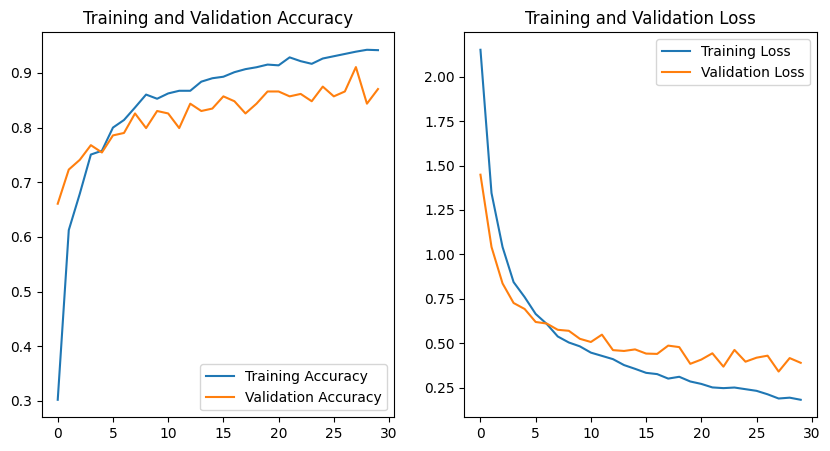

In [ ]:
# Visualize the History Model : Accuracy & Loss
acc_1 = vgg19_history.history['accuracy']
val_acc_1 = vgg19_history.history['val_accuracy']

loss_1 = vgg19_history.history['loss']
val_loss_1 = vgg19_history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save model in Keras format
model_save_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/vgg19_12label30_new.h5'
vgg19_model.save(model_save_path)
print("Model saved to Google Drive at:", model_save_path)

# Save training history to CSV
history_df = pd.DataFrame(vgg19_history.history)
history_save_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/vgg19_history_12label30_new.csv'
history_df.to_csv(history_save_path, index=True)
print("Training history saved to Google Drive at:", history_save_path)

Model saved to Google Drive at: /content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/vgg19_12label30_new.h5
Training history saved to Google Drive at: /content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/vgg19_history_12label30_new.csv


#### Predict Model

In [ ]:
# Define Path Train and Test Directory
predict_dataset_path = "/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Dataset/12 Label/predict2"

# Make Predict Datagen for ImageDataGenerator
predict_datagen = ImageDataGenerator(
    rescale=1./255
)

# Generate Image Generator for predict
predict_generator = predict_datagen.flow_from_directory(
    directory=predict_dataset_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    # color_mode='grayscale',
    shuffle=False
)

file_names = predict_generator.filenames  # save list of test files names to be used later
tlabels = predict_generator.labels # save test labels to be used later
class_dict = predict_generator.class_indices

Found 24 images belonging to 12 classes.


In [ ]:
# Load the Keras model from the uploaded file
# model_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/Checkpoint/vgg19_best_model.h5'  # Update with the correct filename
# model_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/Checkpoint/model_vgg19_28_0.34.h5'  # Update with the correct filename
# vgg19_model = tf.keras.models.load_model(model_path)

# make predictions
preds = vgg19_model.predict(predict_generator, verbose=0)
new_dict = {}
for key in class_dict: # set key in new_dict to value in class_dict and value in new_dict to key in class_dict
    value = class_dict[key]
    new_dict[value] = key
print('PREDICTED CLASS     TRUE CLASS       FILENAME                ERROR STATUS' ) # adjust spacing based on your class names
error_list = [] # empty list to store if the prediction was correct or not
error_file_list = []
for i, p in enumerate(preds):
    pred_index = np.argmax(p) # get the index that has the highest probability
    if pred_index == tlabels[i]:
        error_list.append('No') # correct classification
    else:
        error_list.append('Yes')
        error_file_list.append(file_names[i])
    pred_class = new_dict[pred_index] # find the predicted class based on the index
    true_class = new_dict[tlabels[i]] # use the test label to get the true class of the test file
    file = file_names[i]
    print(f'    {pred_class:10s}       {true_class:10s}    {file:25s}   {error_list[i]}')

PREDICTED CLASS     TRUE CLASS       FILENAME                ERROR STATUS
    Buketan          Buketan       Buketan/Buketan1.jpeg       No
    Buketan          Buketan       Buketan/Buketan2.jpeg       No
    Buketan          Cendrawasih    Cendrawasih/cendrawasih1.jpeg   Yes
    Cendrawasih       Cendrawasih    Cendrawasih/cendrawasih2.jpg   No
    Corak Insang       Corak Insang    Corak Insang/Corak1.jpg     No
    Corak Insang       Corak Insang    Corak Insang/Corak2.jpg     No
    Gunungan         Gunungan      Gunungan/Gunungan1.jpg      No
    Gunungan         Gunungan      Gunungan/Gunungan2.jpg      No
    Sidoluhur        Kawung        Kawung/Kawung1.jpeg         Yes
    Kawung           Kawung        Kawung/Kawung2.jpeg         No
    Megamendung       Megamendung    Megamendung/megamendung1.jpg   No
    Megamendung       Megamendung    Megamendung/megamendung2.jpg   No
    Parang           Parang        Parang/Parang1.jpeg         No
    Parang           Parang        Par

In [ ]:
print(f"True predict : {len(error_list) - len(error_file_list)} from {len(error_list)} or {(len(error_list) - len(error_file_list)) * 100/len(error_list)} %")

True predict : 20 from 24 or 83.33333333333333 %


#### Convert to JSON

In [ ]:
!pip install tensorflowjs

# DON'T RESTART SESSION

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
     

In [ ]:
!cp /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/Checkpoint/model_vgg19_28_0.34.h5 /content/

In [ ]:
# !tensorflowjs_converter --input_format=keras /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/vgg16.h5 /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/
!tensorflowjs_converter --input_format=keras /content/model_vgg19_28_0.34.h5 /content/

2024-06-19 15:26:53.094472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip batik_model_vgg19_12label.zip *.bin model.json

  adding: group1-shard10of45.bin (deflated 7%)
  adding: group1-shard11of45.bin (deflated 7%)
  adding: group1-shard12of45.bin (deflated 7%)
  adding: group1-shard13of45.bin (deflated 7%)
  adding: group1-shard14of45.bin (deflated 7%)
  adding: group1-shard15of45.bin (deflated 7%)
  adding: group1-shard16of45.bin (deflated 7%)
  adding: group1-shard17of45.bin (deflated 7%)
  adding: group1-shard18of45.bin (deflated 7%)
  adding: group1-shard19of45.bin (deflated 7%)
  adding: group1-shard1of45.bin (deflated 7%)
  adding: group1-shard20of45.bin (deflated 8%)
  adding: group1-shard21of45.bin (deflated 8%)
  adding: group1-shard22of45.bin (deflated 8%)
  adding: group1-shard23of45.bin (deflated 8%)
  adding: group1-shard24of45.bin (deflated 8%)
  adding: group1-shard25of45.bin (deflated 8%)
  adding: group1-shard26of45.bin (deflated 8%)
  adding: group1-shard27of45.bin (deflated 8%)
  adding: group1-shard28of45.bin (deflated 8%)
  adding: group1-shard29of45.bin (deflated 8%)
  adding: grou

In [ ]:
files.download("/content/batik_model_vgg19_12label.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3. MobileNetV2

In [ ]:
# Load pretrained Mobile Net V3
mnet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
# Freeze all layers
for layer in mnet.layers:
  layer.trainable = False

# Add custom layers
x = tf.keras.layers.Flatten()(mnet.output)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the final model
mnet_model = tf.keras.models.Model(inputs=mnet.input, outputs=predictions)

# Print model summary
mnet_model.summary(show_trainable=True)

Model: "model_2"
_____________________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  Trainable  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            N          
                                                                                                             
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             N          
                                                                                                             
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               N          
 on)                                                                                                         
                                                                                                       

In [ ]:
EPOCHS = 50

mnet_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy']
)

mnet_history = mnet_model.fit(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN,
      epochs=EPOCHS,
      validation_data=test_generator,
      validation_steps=STEP_SIZE_TEST,
      verbose=1
)

Epoch 1/50
79/79 [==============================] - 1844s 23s/step - loss: 2.3830 - accuracy: 0.4135 - val_loss: 1.0112 - val_accuracy: 0.6923
Epoch 2/50
79/79 [==============================] - 60s 758ms/step - loss: 1.2278 - accuracy: 0.6486 - val_loss: 0.8706 - val_accuracy: 0.7452
Epoch 3/50
79/79 [==============================] - 59s 754ms/step - loss: 0.9437 - accuracy: 0.7203 - val_loss: 0.8259 - val_accuracy: 0.7692
Epoch 4/50
79/79 [==============================] - 60s 759ms/step - loss: 0.8530 - accuracy: 0.7470 - val_loss: 0.7880 - val_accuracy: 0.7716
Epoch 5/50
79/79 [==============================] - 60s 755ms/step - loss: 0.7599 - accuracy: 0.7633 - val_loss: 0.7491 - val_accuracy: 0.7837
Epoch 6/50
79/79 [==============================] - 60s 751ms/step - loss: 0.7031 - accuracy: 0.7940 - val_loss: 0.7158 - val_accuracy: 0.7933
Epoch 7/50
79/79 [==============================] - 59s 751ms/step - loss: 0.6327 - accuracy: 0.8012 - val_loss: 0.7311 - val_accuracy: 0.8077

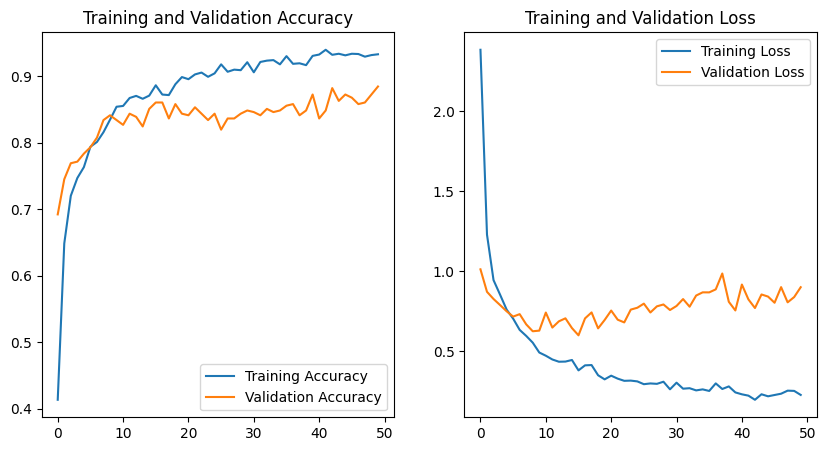

In [ ]:
# Visualize the History Model : Accuracy & Loss
acc_1 = mnet_history.history['accuracy']
val_acc_1 = mnet_history.history['val_accuracy']

loss_1 = mnet_history.history['loss']
val_loss_1 = mnet_history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save model in Keras format
model_save_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/mnetv2_21label50.h5'
mnet_model.save(model_save_path)
print("Model saved to Google Drive at:", model_save_path)

# Save training history to CSV
history_df = pd.DataFrame(mnet_history.history)
history_save_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/mnetv2_history_21label50.csv'
history_df.to_csv(history_save_path, index=True)
print("Training history saved to Google Drive at:", history_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to Google Drive at: /content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/mnetv2_21label50.h5
Training history saved to Google Drive at: /content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/mnetv2_history_21label50.csv


#### Predict Model

In [ ]:
BATCH_SIZE = 32

# Define Path Train and Test Directory
predict_dataset_path = "/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Dataset/predict"

# Make Predict Datagen for ImageDataGenerator
predict_datagen = ImageDataGenerator(
    rescale=1./255
)

# Generate Image Generator for predict
predict_generator = predict_datagen.flow_from_directory(
    directory=predict_dataset_path,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    # color_mode='grayscale',
    shuffle=False
)

file_names = predict_generator.filenames  # save list of test files names to be used later
tlabels = predict_generator.labels # save test labels to be used later
class_dict = predict_generator.class_indices
# code below determines test batch size and test steps so you go through the test images exactly once
length = len(file_names) # determine number of images
b_max = 80 # set maximum batch size you will allow
predict_batch_size = sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=b_max], reverse=True)[0]
predict_steps = int(length/BATCH_SIZE)

Found 465 images belonging to 23 classes.


In [ ]:
# Load the Keras model from the uploaded file
# model_path = '/content/drive/Shareddrives/Capstone - ML/Model 1. Batik Classification/Model/mnetv2_23label50.h5'  # Update with the correct filename
# mnet_model = tf.keras.models.load_model(model_path)

# make predictions
preds = mnet_model.predict(predict_generator, batch_size=predict_batch_size, verbose=0, steps=predict_steps)
new_dict = {}
for key in class_dict: # set key in new_dict to value in class_dict and value in new_dict to key in class_dict
    value = class_dict[key]
    new_dict[value] = key
print('PREDICTED CLASS     TRUE CLASS       FILENAME                ERROR STATUS' ) # adjust spacing based on your class names
error_list = [] # empty list to store if the prediction was correct or not
error_file_list = []
for i, p in enumerate(preds):
    pred_index = np.argmax(p) # get the index that has the highest probability
    if pred_index == tlabels[i]:
        error_list.append('No') # correct classification
    else:
        error_list.append('Yes')
        error_file_list.append(file_names[i])
    pred_class = new_dict[pred_index] # find the predicted class based on the index
    true_class = new_dict[tlabels[i]] # use the test label to get the true class of the test file
    file = file_names[i]
    print(f'    {pred_class:10s}       {true_class:10s}    {file:25s}   {error_list[i]}')

PREDICTED CLASS     TRUE CLASS       FILENAME                ERROR STATUS
    .Non Batik       .Non Batik    .Non Batik/100_cotton_solid_color_flannel_fabric.jpg   No
    .Non Batik       .Non Batik    .Non Batik/620ee4ece48afacf5919bdce0d77ab97--chair-slipcovers-fabric-swatches.jpg   No
    .Non Batik       .Non Batik    .Non Batik/7569.jpg         No
    .Non Batik       .Non Batik    .Non Batik/HMCJLIL_1.jpg    No
    .Non Batik       .Non Batik    .Non Batik/Solid-Fabric-Plain-Chenille-Yarn-Dyed-Jacquard-Woven-Soft-Curtain-Drapery-Sofa-Cushion-Fabrics-Upholstery-Use.jpg   No
    .Non Batik       .Non Batik    .Non Batik/e1.jpg           No
    Truntum          .Non Batik    .Non Batik/et-musuta_b3.jpg   Yes
    Corak Insang       .Non Batik    .Non Batik/fabric-3018258_960_720.jpg   Yes
    Liong            .Non Batik    .Non Batik/fabriccomparision&park+033.JPG   Yes
    .Non Batik       .Non Batik    .Non Batik/quilting-detail.jpg   No
    Buketan          Buketan       Buketan/b

In [ ]:
print(f"True predict : {len(error_list) - len(error_file_list)} from {len(error_list)} or {(len(error_list) - len(error_file_list)) * 100/len(error_list)} %")

True predict : 376 from 448 or 83.92857142857143 %


#### Convert Model to JSON

In [ ]:
!pip install tensorflowjs

# DON'T RESTART SESSION

In [ ]:
!cp /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/mnetv2_21label50.h5 /content/

In [ ]:
# !tensorflowjs_converter --input_format=keras /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/vgg16.h5 /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/
!tensorflowjs_converter --input_format=keras /content/mnetv2_21label50.h5 /content/

2024-06-18 13:08:07.328900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip batik_model_mnetv2.zip *.bin model.json

  adding: group1-shard10of64.bin (deflated 7%)
  adding: group1-shard11of64.bin (deflated 7%)
  adding: group1-shard12of64.bin (deflated 7%)
  adding: group1-shard13of64.bin (deflated 7%)
  adding: group1-shard14of64.bin (deflated 7%)
  adding: group1-shard15of64.bin (deflated 7%)
  adding: group1-shard16of64.bin (deflated 7%)
  adding: group1-shard17of64.bin (deflated 7%)
  adding: group1-shard18of64.bin (deflated 7%)
  adding: group1-shard19of64.bin (deflated 7%)
  adding: group1-shard1of64.bin (deflated 7%)
  adding: group1-shard20of64.bin (deflated 7%)
  adding: group1-shard21of64.bin (deflated 7%)
  adding: group1-shard22of64.bin (deflated 7%)
  adding: group1-shard23of64.bin (deflated 7%)
  adding: group1-shard24of64.bin (deflated 7%)
  adding: group1-shard25of64.bin (deflated 7%)
  adding: group1-shard26of64.bin (deflated 7%)
  adding: group1-shard27of64.bin (deflated 7%)
  adding: group1-shard28of64.bin (deflated 7%)
  adding: group1-shard29of64.bin (deflated 7%)
  adding: grou

In [ ]:
files.download("/content/batik_model_mnetv2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Convert Model to TFLite

In [ ]:
!cp /content/drive/Shareddrives/"Capstone - ML"/"Model 1. Batik Classification"/Model/mnetv2_23label50.h5 /content/

In [ ]:
# Load the H5 model
h5_model_path = '/content/mnetv2_23label50.h5'
model = tf.keras.models.load_model(h5_model_path)

# Convert the model to TFLite format with optimization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable optimizations
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = '/content/model_mnet.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to {tflite_model_path}")

TFLite model saved to /content/model.tflite


In [ ]:
files.download("/content/model_mnet.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>